In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance/states.csv


## The Affordable Care Act (ACA) is the name for the comprehensive health care reform law and its amendments which addresses health insurance coverage, health care costs, and preventive care.
### This dataset tries to answer a few questions along the way.

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset and reveal first 5 rows

In [3]:
df = pd.read_csv('/kaggle/input/health-insurance/states.csv')

In [4]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


## Checking to see if there are any nulls present

In [5]:
df.isna().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

## Check to see the types on replacements that'll be needed, whether mode, median or mean, depending of the data type 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [7]:
df['State Medicaid Expansion (2016)'].value_counts() ## The value_counts will let me know which is the mode 

True     32
False    19
Name: State Medicaid Expansion (2016), dtype: int64

### Replace the null with the mode

In [8]:
df['State Medicaid Expansion (2016)'].replace(np.nan,'True', inplace = True )

### Repeat the process for the other columns with nulls

In [9]:
df['Medicaid Enrollment (2013)'].mean() ## Check for the mean, since it's a float

2255699.08

In [10]:
df['Medicaid Enrollment (2013)'].replace(np.nan,2255699.08, inplace = True ) ## Replace the null with it

In [11]:
df['Medicaid Enrollment Change (2013-2016)'].mean() ## Find the mean of the next column

644246.28

In [12]:
df['Medicaid Enrollment Change (2013-2016)'].replace(np.nan,644246.28, inplace = True ) ## Replace the null with it

In [13]:
df.isna().sum() ## Check to see if all the nulls are gone

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

### Replace True and False with 1 and 0 for ease of graphing

In [14]:
df['State Medicaid Expansion (2016)'].replace('True', 1, inplace = True)
df['State Medicaid Expansion (2016)'].replace('False', 1, inplace = True)

### The first 3 columns are being read as objects. 
1. ### Remove the percentage sign fron the first 3 columns

In [15]:

df['Uninsured Rate (2010)'] = list(map(lambda x: x[:-1], df['Uninsured Rate (2010)'].values))
df['Uninsured Rate (2015)'] = list(map(lambda x: x[:-1], df['Uninsured Rate (2015)'].values))

In [16]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [20]:
df['Uninsured Rate Change (2010-2015)'] = list(map(lambda x: x[:-1], df['Uninsured Rate Change (2010-2015)'].values))

In [21]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


2. ### And convert them from series to float 

In [22]:
df['Uninsured Rate (2010)'] = [float(x) for x in df['Uninsured Rate (2010)'].values]
df['Uninsured Rate (2015)'] = [float(x) for x in df['Uninsured Rate (2015)'].values]
df['Uninsured Rate Change (2010-2015)'] = [float(x) for x in df['Uninsured Rate Change (2010-2015)'].values]

## How has the Affordable Care Act changed the rate of citizens with health insurance coverage?
### It has increased the number of people who are insured

In [23]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


# Which states observed the greatest decline in their uninsured rate? 
### California, Nevada and Oregan. Kentucky and West Virginia also follow after that. 

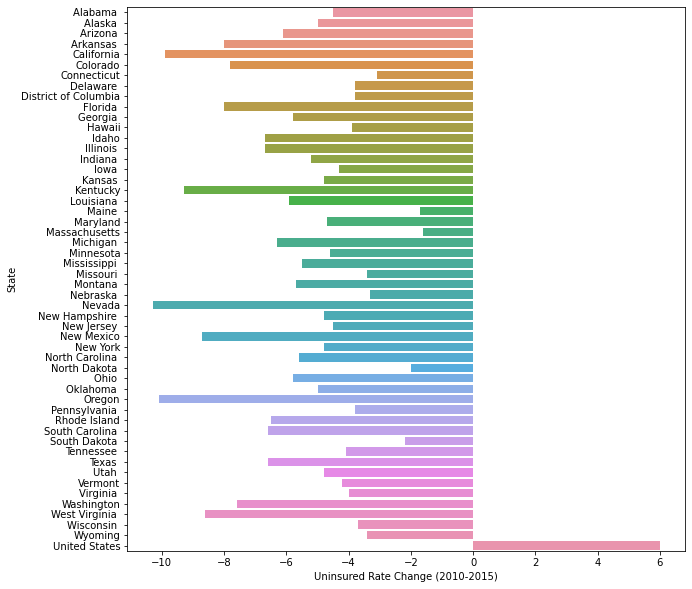

In [24]:
plt.figure(figsize = (10, 10))
sns.barplot('Uninsured Rate Change (2010-2015)', 'State', data = df)
                    

#  Did those states expand Medicaid program coverage and/or implement a health insurance marketplace?
### California had both an increase in Employment enrollment and Medicaid expansion
### Nevada and Oregan can mostly be explained by having a Medicaid Expansion. Kentucky and West Virginia also have that.


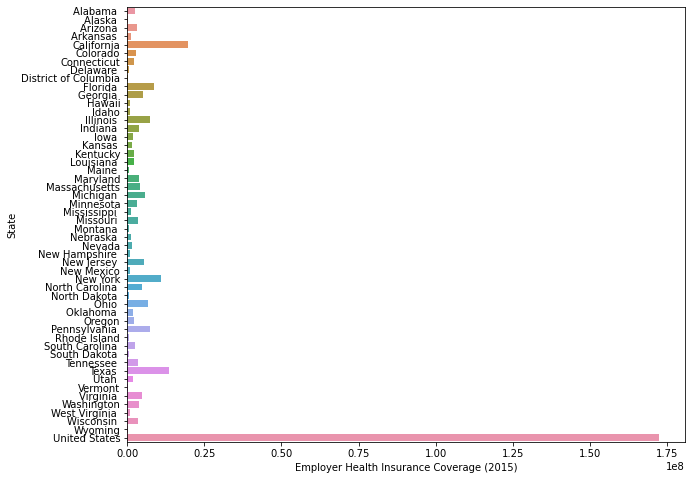

In [25]:
plt.figure(figsize = (10, 8))
sns.barplot('Employer Health Insurance Coverage (2015)','State', data = df)

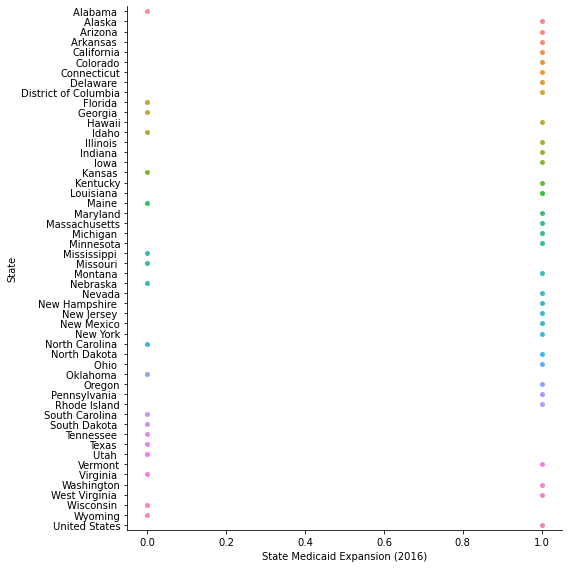

In [26]:

sns.catplot('State Medicaid Expansion (2016)','State',kind = 'swarm', data = df, height = 8)

## What do you predict will happen to the nationwide uninsured rate in the next five years?
### If everything stays the way it is, it should follow the linear projection below and continue to decrease

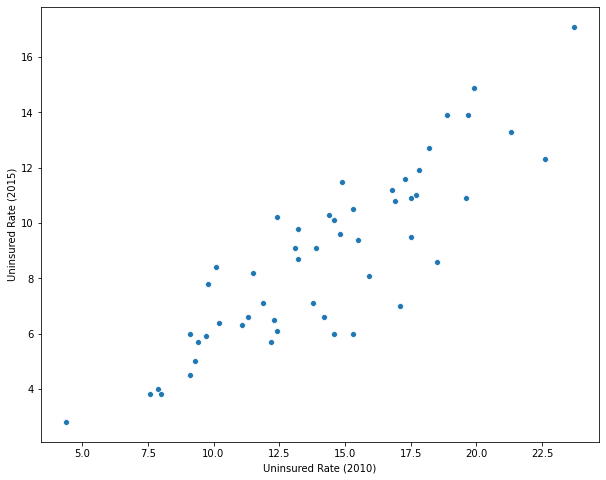

In [27]:
plt.figure(figsize = (10, 8))
sns.scatterplot('Uninsured Rate (2010)', 'Uninsured Rate (2015)', data = df)

### This graph reveals more people are enrolled on health insurance on average

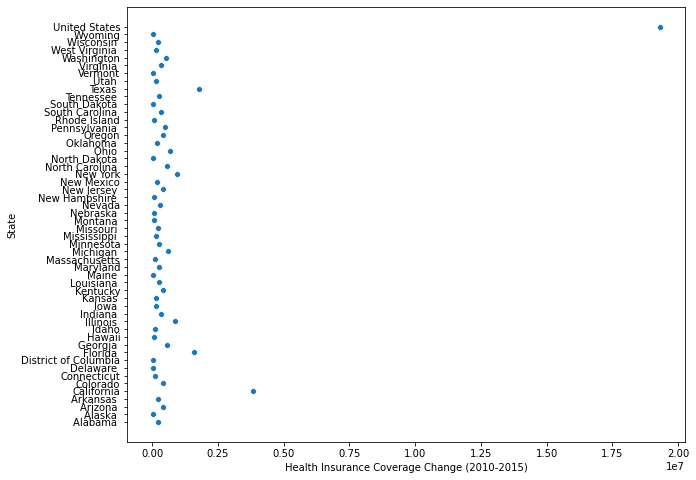

In [28]:
 
plt.figure(figsize = (10, 8))
sns.scatterplot('Health Insurance Coverage Change (2010-2015)','State', data = df)

## In 2016, health insurance coverage, overall, went up; some states show a significant increase than others: Texas, California, Florida

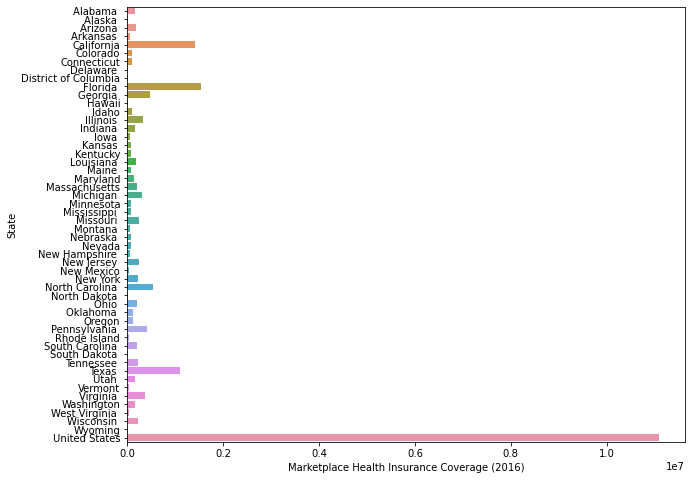

In [29]:
plt.figure(figsize = (10, 8))
sns.barplot('Marketplace Health Insurance Coverage (2016)','State', data = df) 



# The higher the market place insurance coverage, the more tax credits the states get

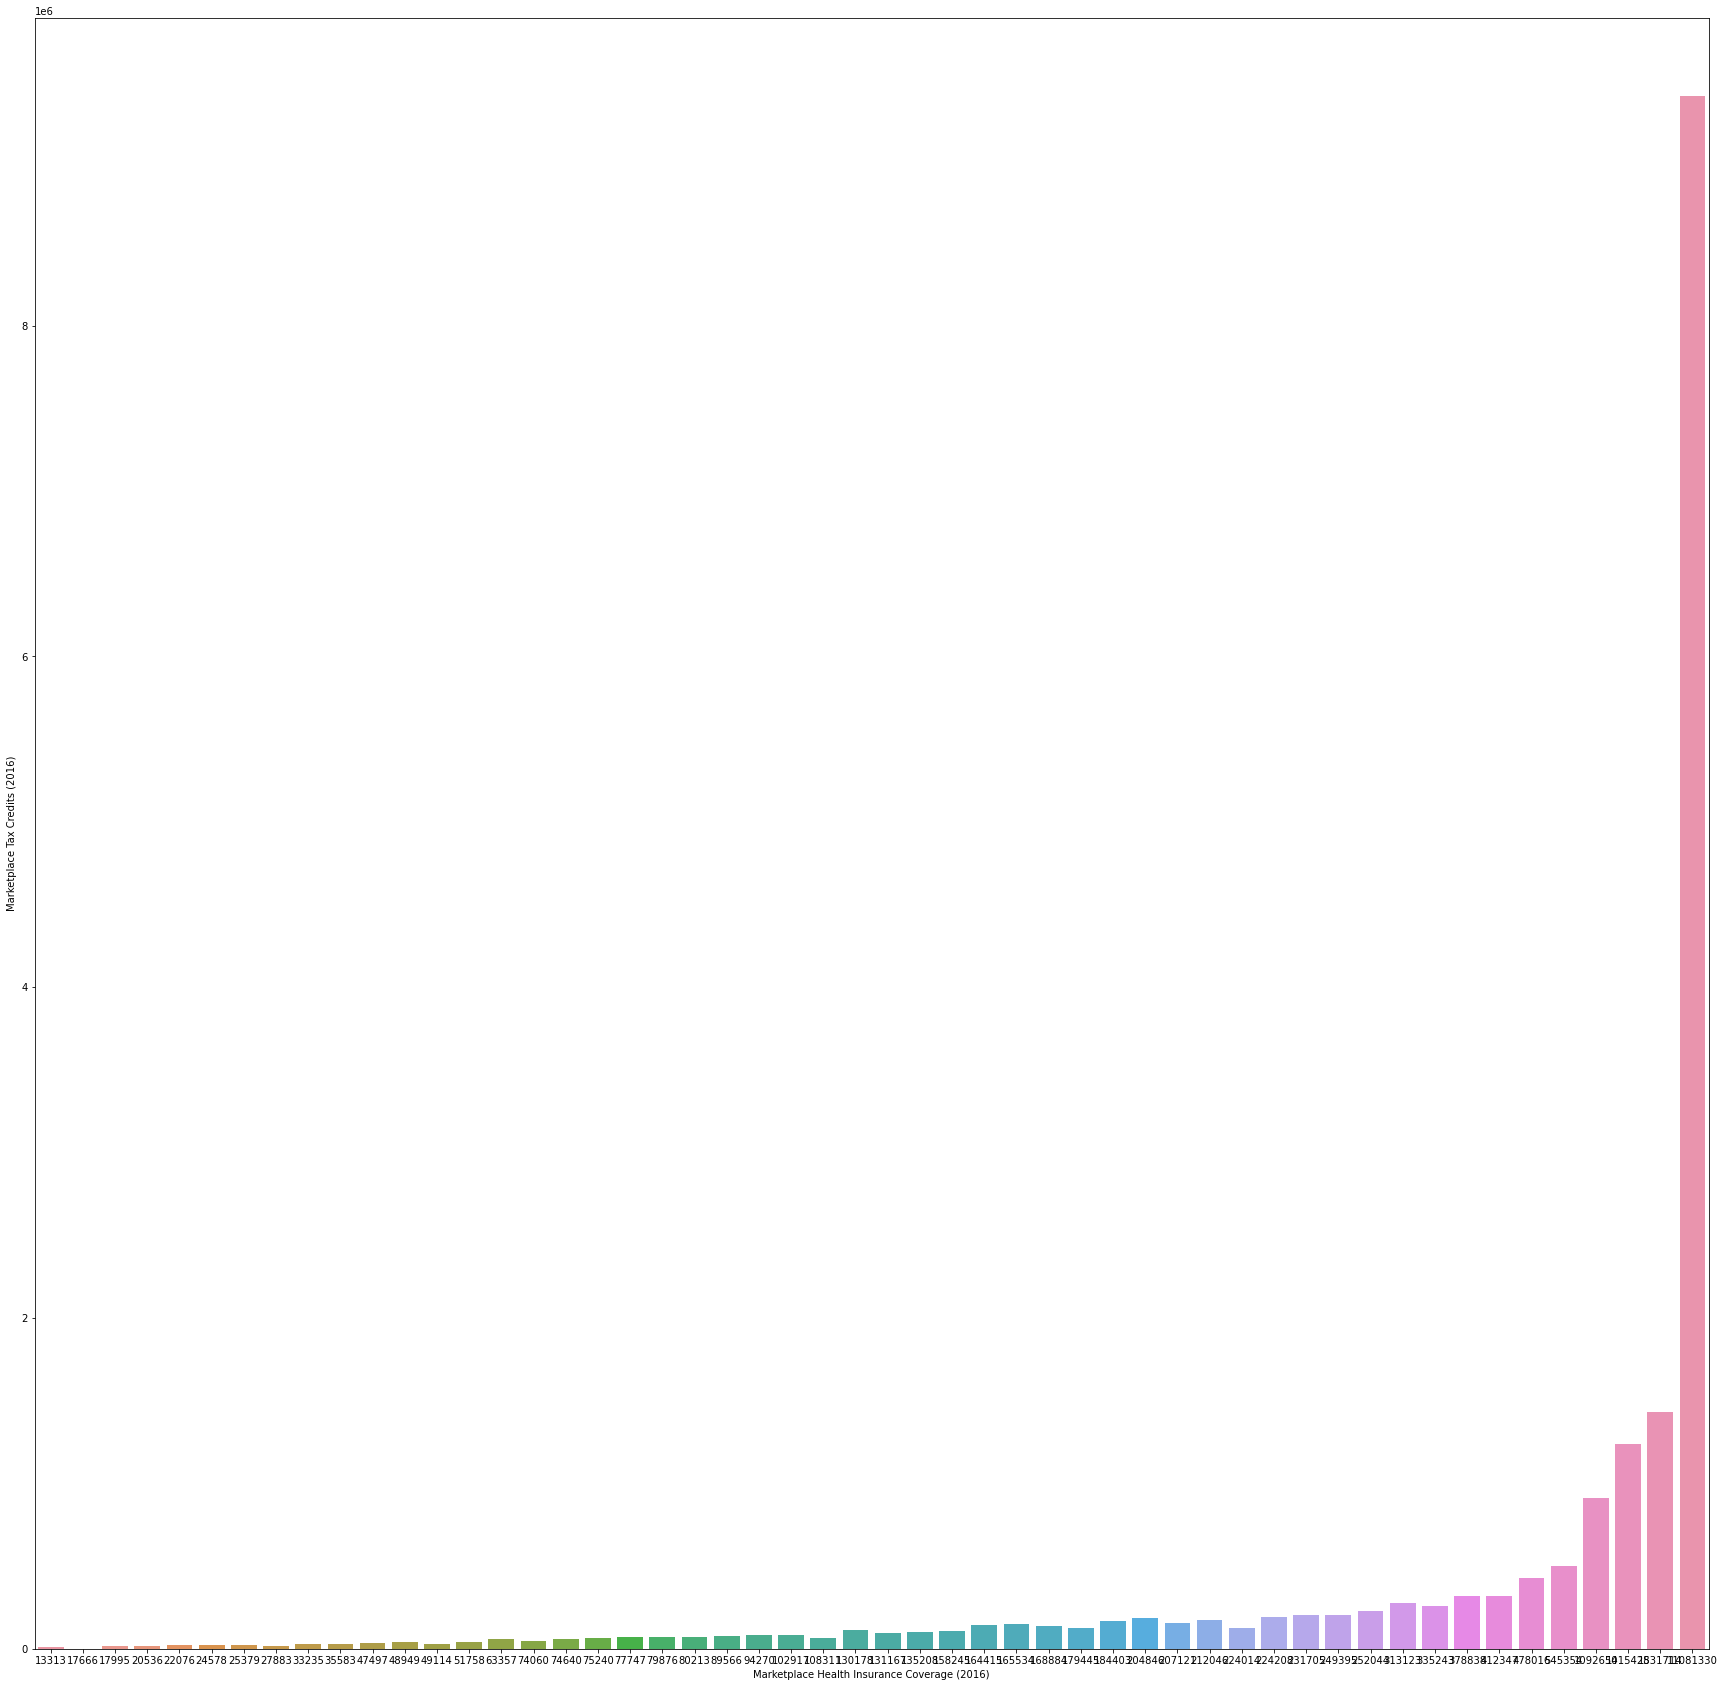

In [30]:
plt.figure(figsize = (30,30)) 
sns.barplot('Marketplace Health Insurance Coverage (2016)','Marketplace Tax Credits (2016)', data = df)

### In 2016, the Marketplace increase in health insurance is not due to State Medicaid expansion

[(0.0, 1000000.0)]

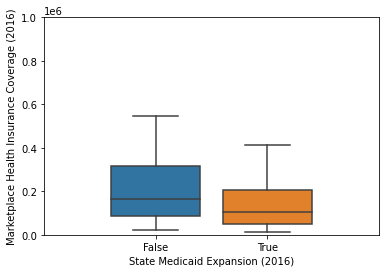

In [31]:
a_plot = sns.boxplot('State Medicaid Expansion (2016)','Marketplace Health Insurance Coverage (2016)', data = df)
a_plot.set(xlim=(-1, 2))
a_plot.set(ylim=(0,1000000))


### Medicaid Enrollment increased slightly in 2016 from 2013

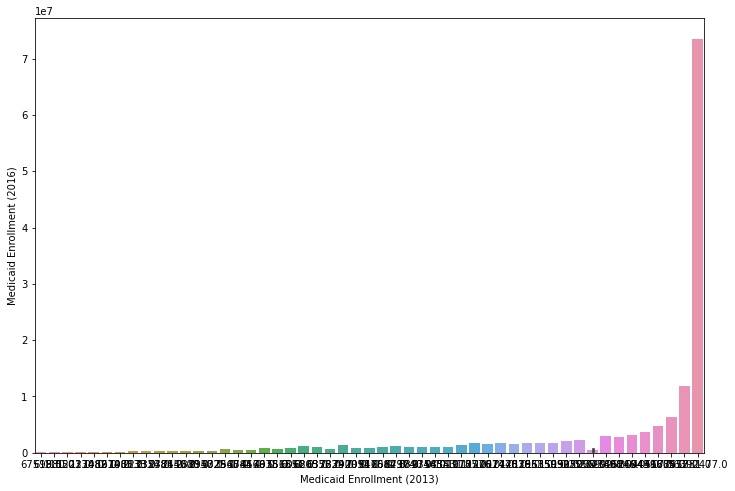

In [32]:
plt.figure(figsize = (12,8))
sns.barplot('Medicaid Enrollment (2013)','Medicaid Enrollment (2016)', data = df)

### On average Medicaid enrollment across all states in 2016 increased; California being the biggest 

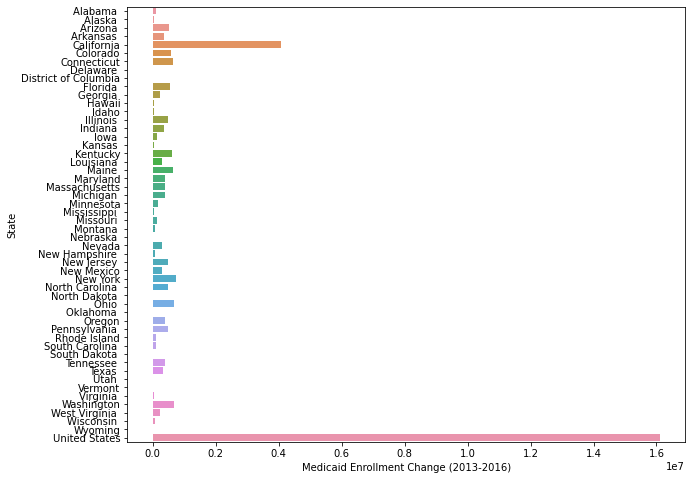

In [33]:
plt.figure(figsize = (10,8))
sns.barplot('Medicaid Enrollment Change (2013-2016)','State', data = df) 

## Comparing Medicare enrollment in 2016 versus Medicaid. I'll modify the limits of the x and y axes, so I can see the points better

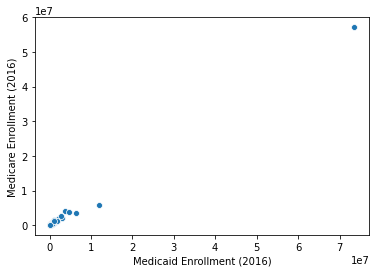

In [34]:
sns.scatterplot('Medicaid Enrollment (2016)','Medicare Enrollment (2016)', data = df)

## Modifying the limits...
### The graph shows an almost one-to-one enrollment, but it looks like Medicaid enrollment is slightly more than medicare in 2016.

[(0.0, 5000000.0)]

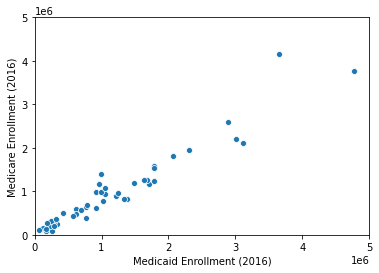

In [35]:
a_plot = sns.scatterplot('Medicaid Enrollment (2016)','Medicare Enrollment (2016)', data = df)
a_plot.set(xlim=(0, 5000000))
a_plot.set(ylim=(0, 5000000))

